In [1]:
# Makes the display take up more of the screen
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))

In [2]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.
C:\Users\M323742\Anaconda3\envs\RBE595\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\M323742\Anaconda3\envs\RBE595\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\M323742\Anaconda3\envs\RBE595\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\M323742\Anaconda3\envs\RBE595

In [3]:
from keras.preprocessing.image import ImageDataGenerator
from keras.constraints import maxnorm
from keras.callbacks import ModelCheckpoint

In [4]:
import seaborn as sns
import random
import datetime as dt # for date sorting

In [5]:
seed = 7
np.random.seed(seed)

In [6]:
now=dt.datetime.now()

# Multi-Layer Perceptron
You will find an implementation of a Multi-Layer Perceptron Model solving this problem in Files/
Week 6/CNN MNIST/mnist_mlp_baseline.py. The MLP model should report a prediction error of
approximately 1.70%<br>
<br>Your assignment consists in outperform this implementation and cross the barrier of 1% prediction
error (less than 1%) by developing your own MLP model.<br>
<br>Your submission should consist in a python code (Keras+Theano) of your algorithm and a report
with a detailed explanation about the development and performance of your model. The model that
outperform all the models developed in our course will get extra credit (1 point).

In [7]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [8]:
num_pixels = X_train.shape[1] * X_train.shape[2]

In [9]:
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [10]:
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [11]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [12]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

# MLP Model to Outperform

In [13]:
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, init='normal', activation='relu'))
    model.add(Dense(num_classes, init='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [14]:
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=10, batch_size=200, verbose=2)


C:\Users\M323742\Anaconda3\envs\RBE595\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(784, input_dim=784, activation="relu", kernel_initializer="normal")`
  after removing the cwd from sys.path.
C:\Users\M323742\Anaconda3\envs\RBE595\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, activation="softmax", kernel_initializer="normal")`
  """
C:\Users\M323742\Anaconda3\envs\RBE595\lib\site-packages\ipykernel_launcher.py:4: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  after removing the cwd from sys.path.



Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 2s - loss: 0.2782 - accuracy: 0.9211 - val_loss: 0.1410 - val_accuracy: 0.9575
Epoch 2/10
 - 3s - loss: 0.1114 - accuracy: 0.9677 - val_loss: 0.0925 - val_accuracy: 0.9709
Epoch 3/10
 - 3s - loss: 0.0718 - accuracy: 0.9795 - val_loss: 0.0782 - val_accuracy: 0.9769
Epoch 4/10
 - 3s - loss: 0.0503 - accuracy: 0.9855 - val_loss: 0.0747 - val_accuracy: 0.9771
Epoch 5/10
 - 2s - loss: 0.0375 - accuracy: 0.9893 - val_loss: 0.0667 - val_accuracy: 0.9791
Epoch 6/10
 - 2s - loss: 0.0268 - accuracy: 0.9925 - val_loss: 0.0626 - val_accuracy: 0.9809
Epoch 7/10
 - 2s - loss: 0.0208 - accuracy: 0.9950 - val_loss: 0.0626 - val_accuracy: 0.9807
Epoch 8/10
 - 2s - loss: 0.0140 - accuracy: 0.9969 - val_loss: 0.0620 - val_accuracy: 0.9801
Epoch 9/10
 - 3s - loss: 0.0106 - accuracy: 0.9978 - val_loss: 0.0587 - val_accuracy: 0.9810
Epoch 10/10
 - 2s - loss: 0.0082 - accuracy: 0.9985 - val_loss: 0.0600 - val_accuracy: 0.9806


In [15]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Baseline Error: 1.94%


In [16]:
num_pixels

784

# Better MLP Model

In [19]:
def better_mlp_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, init='normal', activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(128, init='normal', activation='relu', W_constraint=maxnorm(3)))
    model.add(Dropout(dropout))
    model.add(Dense(256, init='normal', activation='relu', W_constraint=maxnorm(3)))
    model.add(Dropout(dropout))
    model.add(Dense(512, init='normal', activation='relu', W_constraint=maxnorm(3)))
    model.add(Dropout(dropout))
    model.add(Dense(num_classes, init='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [20]:
batch_size=128
nb_epochs=50
dropout=0.2

# build the model
model = better_mlp_model()
model.summary()

C:\Users\M323742\Anaconda3\envs\RBE595\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(784, input_dim=784, activation="relu", kernel_initializer="normal")`
  after removing the cwd from sys.path.
C:\Users\M323742\Anaconda3\envs\RBE595\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(128, activation="relu", kernel_initializer="normal", kernel_constraint=<keras.con...)`
  
C:\Users\M323742\Anaconda3\envs\RBE595\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(256, activation="relu", kernel_initializer="normal", kernel_constraint=<keras.con...)`
  
C:\Users\M323742\Anaconda3\envs\RBE595\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(512, activation="relu", kernel_initializer="normal", kernel_constraint=<keras.con...)`
  # Remove the CWD from sys.path wh

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 784)               615440    
_________________________________________________________________
dropout_1 (Dropout)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               33024     
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)              

In [21]:
# checkpoint
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [22]:
# Fit the model
history=model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=nb_epochs, batch_size=batch_size, callbacks=callbacks_list, verbose=2)

C:\Users\M323742\Anaconda3\envs\RBE595\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 60000 samples, validate on 10000 samples
Epoch 1/50
 - 8s - loss: 0.3104 - accuracy: 0.9055 - val_loss: 0.1125 - val_accuracy: 0.9651

Epoch 00001: val_accuracy improved from -inf to 0.96510, saving model to weights.best.hdf5
Epoch 2/50
 - 6s - loss: 0.1219 - accuracy: 0.9637 - val_loss: 0.1087 - val_accuracy: 0.9657

Epoch 00002: val_accuracy improved from 0.96510 to 0.96570, saving model to weights.best.hdf5
Epoch 3/50
 - 7s - loss: 0.0938 - accuracy: 0.9717 - val_loss: 0.0962 - val_accuracy: 0.9707

Epoch 00003: val_accuracy improved from 0.96570 to 0.97070, saving model to weights.best.hdf5
Epoch 4/50
 - 7s - loss: 0.0748 - accuracy: 0.9775 - val_loss: 0.0736 - val_accuracy: 0.9794

Epoch 00004: val_accuracy improved from 0.97070 to 0.97940, saving model to weights.best.hdf5
Epoch 5/50
 - 7s - loss: 0.0615 - accuracy: 0.9813 - val_loss: 0.0639 - val_accuracy: 0.9806

Epoch 00005: val_accuracy improved from 0.97940 to 0.98060, saving model to weights.best.hdf5
Epoch 6/50
 -

In [23]:
model.load_weights("weights.best.hdf5")

In [24]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Better MLP Error: %.2f%%" % (100-scores[1]*100))

Better MLP Error: 1.37%


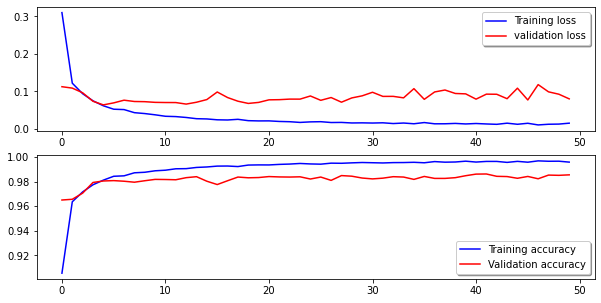

In [25]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1, figsize=(10, 5))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [26]:
y_pred = model.predict(X_test)
X_test__ = X_test.reshape(X_test.shape[0], 28, 28)

In [27]:
Actual=[y_test[i].argmax() for i, val in enumerate(y_test) ]
Prediction=[y_pred[i].argmax() for i, val in enumerate(y_pred) ]

df_pred=pd.DataFrame(y_pred)

df_pred['Actual']=Actual
df_pred['Prediction']=Prediction
df_pred['Error']=df_pred['Actual']-df_pred['Prediction']
df_pred.loc[df_pred[df_pred['Error']!=0].index,'Error']=1 # if incorrect 1 else 0

# Find the probability associated with the actual digit
vfunc=np.vectorize(lambda idx: df_pred.loc[idx,df_pred.loc[idx,'Actual']])
df_pred['Probability']=vfunc(df_pred.index)

In [28]:
# Sort by least confident 
df_pred.sort_values('Probability', inplace=True)

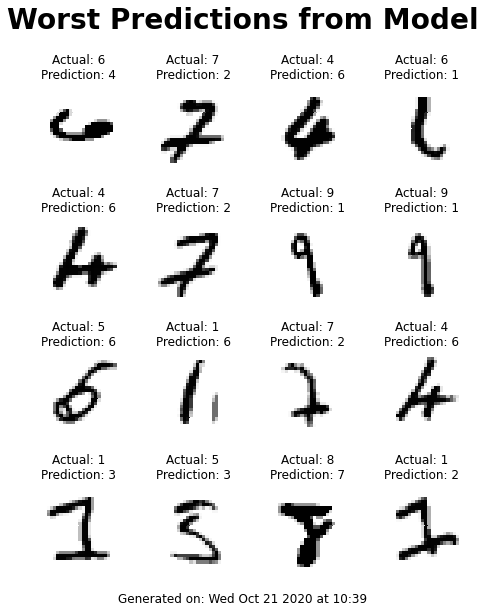

In [29]:
row=4; col=4
fig, axes = plt.subplots(row, col, gridspec_kw={'hspace': 0.5, 'wspace': 0.1}, figsize=(8, 9))
count=0
for r in range(row):
    for c in range(col):
        idx=df_pred.index[count]
        sns.heatmap(X_test__[idx],ax=axes[r,c], square=True, cbar=False,vmin=0,vmax=1,cmap='Greys')
        axes[r,c].set(title = f"Actual: {df_pred.loc[idx,'Actual']}\nPrediction: {df_pred.loc[idx,'Prediction']}");
        axes[r,c].set_xticks([])
        axes[r,c].set_yticks([])
        
        count+=1
        
fig.suptitle('Worst Predictions from Model',y=1.0, ha='center', fontsize=28, fontweight='bold')
plt.figtext(0.5,  .08, f'Generated on: {now.strftime("%a %b %d %Y")} at {now.strftime("%H:%M")}', 
            color='Black', ha='center',fontsize=12)

plt.show()

# Convolutional Neural Network 
You will find an implementation of a Convolutional Neural Network Model solving this problem in
Files/ Week 6/CNN MNIST/mnist_cnn.py. The CNN model should report a prediction error of
approximately 1%.<br>
<br>Your assignment consists in outperform this implementation and cross the barrier of 1% prediction
error (less than 1%) by developing your own CNN model.<br>
<br>Your submission should consist in a python code (Keras+Theano or Keras+TensorFlow) of your
algorithm and a report with a detailed explanation about the development and performance of your
model. The model that outperform all the models developed in our course will get extra credit (1
point).

In [30]:
# Reload data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [31]:
# reshape to be [samples][channels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

In [32]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

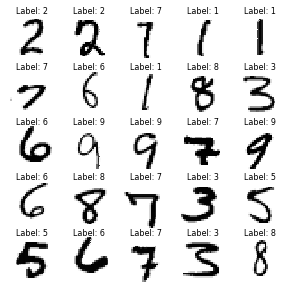

In [36]:
## Data visualization
row=5
col=5
fig, axes = plt.subplots(row, col, gridspec_kw={'hspace': 0.1, 'wspace': 0.1}, figsize=(5,5))
for r in range(row):
    for c in range(col):
        idx=random.randint(0, X_train.shape[0]) # pick random index to display
        sns.heatmap(X_train[idx][0],ax=axes[r,c], square=True, cbar=False,vmin=0,vmax=1,cmap='Greys')
        axes[r,c].set_title(f'Label: {y_train[idx]}',y=0.85, size=8)
        axes[r,c].set_xticks([])
        axes[r,c].set_yticks([])
        
plt.show()

In [37]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [38]:
num_classes = y_test.shape[1]

In [39]:
X_train.shape[0]

60000

In [40]:
y_train[idx]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

# CNN Model to outperform:

In [41]:
# reshape to be [samples][width][height][channels]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

In [42]:
input_shape = (28, 28,1)

In [43]:
# define a simple CNN model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Convolution2D(32, (5, 5), border_mode='valid', input_shape=input_shape, activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [44]:
# build the model
model = baseline_model()

C:\Users\M323742\Anaconda3\envs\RBE595\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (5, 5), input_shape=(28, 28, 1..., activation="relu", padding="valid")`
  """


In [45]:
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=10, batch_size=200, verbose=2)

C:\Users\M323742\Anaconda3\envs\RBE595\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 14s - loss: 0.2385 - accuracy: 0.9316 - val_loss: 0.0789 - val_accuracy: 0.9749
Epoch 2/10
 - 14s - loss: 0.0751 - accuracy: 0.9778 - val_loss: 0.0508 - val_accuracy: 0.9833
Epoch 3/10
 - 13s - loss: 0.0503 - accuracy: 0.9844 - val_loss: 0.0423 - val_accuracy: 0.9859
Epoch 4/10
 - 13s - loss: 0.0395 - accuracy: 0.9877 - val_loss: 0.0369 - val_accuracy: 0.9873
Epoch 5/10
 - 13s - loss: 0.0325 - accuracy: 0.9900 - val_loss: 0.0326 - val_accuracy: 0.9889
Epoch 6/10
 - 13s - loss: 0.0266 - accuracy: 0.9913 - val_loss: 0.0335 - val_accuracy: 0.9888
Epoch 7/10
 - 13s - loss: 0.0222 - accuracy: 0.9930 - val_loss: 0.0329 - val_accuracy: 0.9891
Epoch 8/10
 - 13s - loss: 0.0190 - accuracy: 0.9940 - val_loss: 0.0365 - val_accuracy: 0.9884
Epoch 9/10
 - 13s - loss: 0.0163 - accuracy: 0.9949 - val_loss: 0.0390 - val_accuracy: 0.9881
Epoch 10/10
 - 13s - loss: 0.0133 - accuracy: 0.9958 - val_loss: 0.0313 - val_accuracy: 0.9895


In [46]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

CNN Error: 1.05%


# Better CNN Model With Image Augmentation

In [47]:
def Better_CNN_model():
    # create model
    model = Sequential()
    model.add(Convolution2D(64, (3, 3), input_shape=input_shape, activation='relu', padding='same'))
    model.add(Convolution2D(64, kernel_size = (3,3), activation="relu",padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(dropout))
    
    model.add(Convolution2D(128, (3, 3), activation='relu', padding='same'))
    model.add(Convolution2D(128, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Dropout(dropout))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(dropout))
    
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [48]:
batch_size=128
nb_epochs=50
dropout=0.2

# build the model
model = Better_CNN_model()
#data augmentation
datagen = ImageDataGenerator(featurewise_center=False,  # set input mean to 0 over the dataset
                            samplewise_center=False,  # set each sample mean to 0
                            featurewise_std_normalization=False,  # divide inputs by std of the dataset
                            samplewise_std_normalization=False,  # divide each input by its std
                            zca_whitening=False,  # apply ZCA whitening
                            rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
                            zoom_range = 0.1, # Randomly zoom image 
                            width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
                            height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
                            horizontal_flip=False,  # randomly flip images
                            vertical_flip=False)  # randomly flip images

train_gen = datagen.flow(X_train, y_train, batch_size=batch_size)
test_gen = datagen.flow(X_test, y_test, batch_size=batch_size)
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 128)        

In [49]:
# checkpoint
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [50]:
history = model.fit_generator(train_gen,
                              epochs = nb_epochs, 
                              steps_per_epoch = X_train.shape[0] // batch_size,
                              validation_data = test_gen,
                              validation_steps = X_test.shape[0] // batch_size,
                              callbacks=callbacks_list
                             )

Epoch 1/50
468/468 [==============================] - 311s 664ms/step - loss: 0.2224 - accuracy: 0.9278 - val_loss: 0.0260 - val_accuracy: 0.9828

Epoch 00001: val_accuracy improved from -inf to 0.98277, saving model to weights.best.hdf5
Epoch 2/50
468/468 [==============================] - 304s 649ms/step - loss: 0.0708 - accuracy: 0.9787 - val_loss: 0.0797 - val_accuracy: 0.9878

Epoch 00002: val_accuracy improved from 0.98277 to 0.98784, saving model to weights.best.hdf5
Epoch 3/50
468/468 [==============================] - 307s 655ms/step - loss: 0.0521 - accuracy: 0.9840 - val_loss: 0.0422 - val_accuracy: 0.9891

Epoch 00003: val_accuracy improved from 0.98784 to 0.98906, saving model to weights.best.hdf5
Epoch 4/50
468/468 [==============================] - 298s 637ms/step - loss: 0.0429 - accuracy: 0.9865 - val_loss: 0.0198 - val_accuracy: 0.9886

Epoch 00004: val_accuracy did not improve from 0.98906
Epoch 5/50
468/468 [==============================] - 303s 646ms/step - loss: 

468/468 [==============================] - 302s 645ms/step - loss: 0.0122 - accuracy: 0.9961 - val_loss: 0.0041 - val_accuracy: 0.9942

Epoch 00039: val_accuracy did not improve from 0.99656
Epoch 40/50
468/468 [==============================] - 292s 624ms/step - loss: 0.0126 - accuracy: 0.9957 - val_loss: 0.0111 - val_accuracy: 0.9950

Epoch 00040: val_accuracy did not improve from 0.99656
Epoch 41/50
468/468 [==============================] - 302s 645ms/step - loss: 0.0127 - accuracy: 0.9959 - val_loss: 2.2846e-04 - val_accuracy: 0.9943

Epoch 00041: val_accuracy did not improve from 0.99656
Epoch 42/50
468/468 [==============================] - 305s 652ms/step - loss: 0.0123 - accuracy: 0.9962 - val_loss: 0.0600 - val_accuracy: 0.9944

Epoch 00042: val_accuracy did not improve from 0.99656
Epoch 43/50
468/468 [==============================] - 299s 640ms/step - loss: 0.0129 - accuracy: 0.9962 - val_loss: 4.3386e-04 - val_accuracy: 0.9943

Epoch 00043: val_accuracy did not improve fr

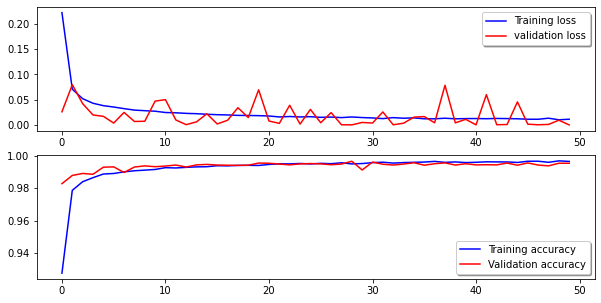

In [51]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1, figsize=(10, 5))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [52]:
model.load_weights("weights.best.hdf5")

In [53]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("New and Better CNN Error: %.2f%%" % (100-scores[1]*100))

New and Better CNN Error: 0.42%


In [54]:
y_pred = model.predict(X_test)
X_test__ = X_test.reshape(X_test.shape[0], 28, 28)

In [55]:
Actual=[y_test[i].argmax() for i, val in enumerate(y_test) ]
Prediction=[y_pred[i].argmax() for i, val in enumerate(y_pred) ]

df_pred=pd.DataFrame(y_pred)

df_pred['Actual']=Actual
df_pred['Prediction']=Prediction
df_pred['Error']=df_pred['Actual']-df_pred['Prediction']
df_pred.loc[df_pred[df_pred['Error']!=0].index,'Error']=1 # if incorrect 1 else 0

# Find the probability associated with the actual digit
vfunc=np.vectorize(lambda idx: df_pred.loc[idx,df_pred.loc[idx,'Actual']])
df_pred['Probability']=vfunc(df_pred.index)

In [56]:
# Sort by least confident 
df_pred.sort_values('Probability', inplace=True)

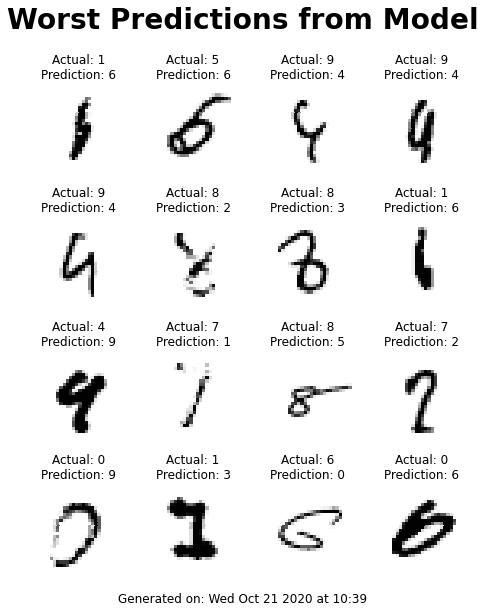

In [57]:
row=4; col=4
fig, axes = plt.subplots(row, col, gridspec_kw={'hspace': 0.5, 'wspace': 0.1}, figsize=(8, 9))
count=0
for r in range(row):
    for c in range(col):
        idx=df_pred.index[count]
        sns.heatmap(X_test__[idx],ax=axes[r,c], square=True, cbar=False,vmin=0,vmax=1,cmap='Greys')
        axes[r,c].set(title = f"Actual: {df_pred.loc[idx,'Actual']}\nPrediction: {df_pred.loc[idx,'Prediction']}");
        axes[r,c].set_xticks([])
        axes[r,c].set_yticks([])
        
        count+=1
        
fig.suptitle('Worst Predictions from Model',y=1.0, ha='center', fontsize=28, fontweight='bold')
plt.figtext(0.5,  .08, f'Generated on: {now.strftime("%a %b %d %Y")} at {now.strftime("%H:%M")}', 
            color='Black', ha='center',fontsize=12)

plt.show()

# Fin

In [58]:
# Converts notebook cells with # Export written on first line into python script 
#!python notebook2script.py RBE595_HW4_MNIST.ipynb

In [59]:
import gc
gc.collect()

58856

In [60]:
print("Finished:", dt.datetime.now())

Finished: 2020-10-21 15:04:28.374180
